Neural Networks

A neural network is composed of interconnected units called neurons or nodes organized into layers. The three main types of layers are:

**Input Layer:**

Dimensions: The input layer should have neurons equal to the number of features or variables in your dataset. For instance, if you have an image dataset with images of size 28x28 pixels, the input layer for a fully connected network would have 784 (28x28) neurons.

Preprocessing: Ensure that your data is preprocessed and scaled appropriately before feeding it into the neural network.

**Hidden Layers:**

Number of Layers: The number of hidden layers and neurons in each layer is a hyperparameter that often requires experimentation. For simpler problems, one or two hidden layers might suffice, while more complex problems might benefit from deeper architectures with more layers.

Neurons per Layer: The number of neurons in each hidden layer is a trade-off between the model's capacity and overfitting. Adding more neurons can increase the model's capacity to learn complex patterns, but it might also lead to overfitting if not regularized properly.

Activation Functions: Choose appropriate activation functions (e.g., ReLU, tanh, sigmoid) for the hidden layers. ReLU (Rectified Linear Unit) is commonly used due to its efficiency and ability to alleviate the vanishing gradient problem.

**Output Layer:**

Dimensions: The output layer's neurons depend on the problem type. For example:
For binary classification, you might have a single neuron with a sigmoid activation function.

For multi-class classification, the number of neurons equals the number of classes, using softmax activation.

For regression tasks, you might have a single neuron with no activation function or a linear activation function.

Loss Function: The choice of the loss function depends on the task (e.g., mean squared error for regression, binary cross-entropy for binary classification, categorical cross-entropy for multi-class classification).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical


In [2]:
# #Keras ...
# Keras is an open-source neural network library written in Python.
# It is designed to enable fast experimentation with deep neural networks and provides a user-friendly,
# high-level interface for building and training neural networks.

In [14]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [15]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [16]:
# Preprocess the data
train_images = train_images.astype('float32') / 255.0    #normalizing image data to 0-1
test_images = test_images.astype('float32') / 255.0

In [17]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [18]:
train_images = train_images.reshape((-1, 28 * 28))  #converting 2-D into single D
test_images = test_images.reshape((-1, 28 * 28))

In [19]:
train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [20]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [21]:
train_labels = to_categorical(train_labels)  #convert class labels into a one-hot encoded format
test_labels = to_categorical(test_labels)


In [22]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [23]:
len(train_images[0])

784

In [24]:
# Build the neural network model
model = Sequential()

In [25]:
#Input Layer
model.add(Dense(128, activation='relu', input_shape=(28 * 28,)))

#Hidden Layer
model.add(Dense(64, activation='relu'))

#Output Layer , nodes depend on the number of ouptuts
model.add(Dense(10, activation='softmax'))

# Compile the model
#List of optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD']
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.1)

In [27]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0830 - accuracy: 0.9761


In [28]:
test_acc

0.9761000275611877

In [29]:
test_loss

0.08297429978847504

In [31]:
history.history

{'loss': [0.36315473914146423,
  0.1467113047838211,
  0.10100886225700378,
  0.07546579092741013,
  0.060157354921102524,
  0.04822632670402527,
  0.03805849701166153,
  0.03153853863477707,
  0.026637233793735504,
  0.02258903719484806],
 'accuracy': [0.8981851935386658,
  0.9562777876853943,
  0.9696481227874756,
  0.9775740504264832,
  0.9818333387374878,
  0.9857407212257385,
  0.9889259338378906,
  0.9901666641235352,
  0.9920926094055176,
  0.99272221326828],
 'val_loss': [0.15163226425647736,
  0.10964679718017578,
  0.09263140708208084,
  0.08939667791128159,
  0.0798235610127449,
  0.07637781649827957,
  0.06765060126781464,
  0.07505010068416595,
  0.07797171175479889,
  0.07410413026809692],
 'val_accuracy': [0.9566666483879089,
  0.9691666960716248,
  0.9723333120346069,
  0.9733333587646484,
  0.9769999980926514,
  0.9760000109672546,
  0.9816666841506958,
  0.9791666865348816,
  0.9788333177566528,
  0.9794999957084656]}

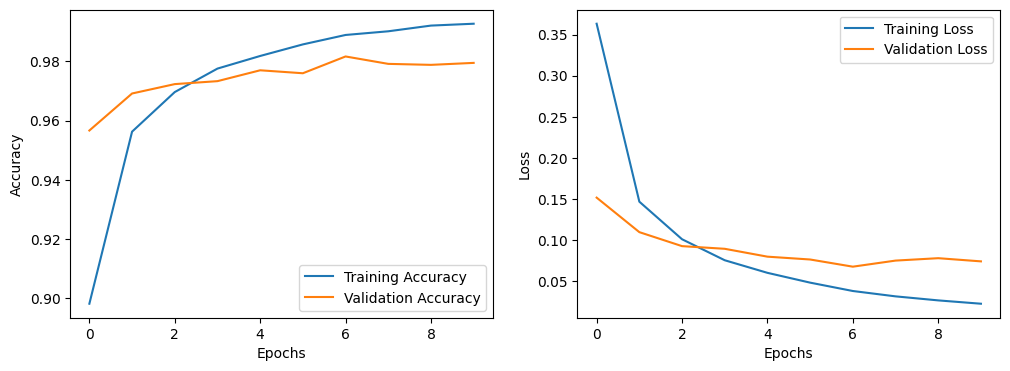

In [32]:

# Plot training history (accuracy and loss)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


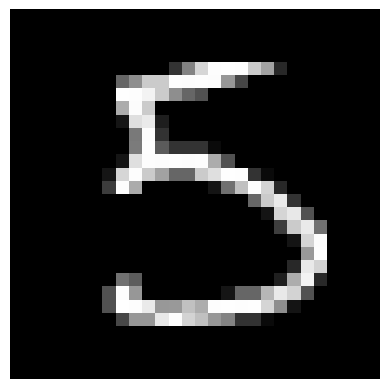

In [36]:
import numpy as np
import matplotlib.pyplot as plt


# Reshape the vector into a 28x28 grayscale image
image = test_images[15].reshape((28, 28))

# Plot the image using Matplotlib
plt.imshow(image, cmap='gray')  # Display the image in grayscale
plt.axis('off')  # Remove axis ticks
plt.show()


In [37]:
#Prediction
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [44]:
# Reshape for a ConvNet expecting input shape (28, 28, 1)
image = test_images[0].reshape((-1, 28 * 28))

# Make a prediction
prediction = model.predict(image)

# Get the predicted class
predicted_class = np.argmax(prediction, axis=1)

print("Predicted class:", predicted_class)
print("Actual Class :", test_labels[0])

1/1 [==============================] - 0s 60ms/step
Predicted class: [7]
Actual Class : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
